# Project: Wrangle and Analyze Data

## Gathering data:

In [1]:
import pandas as pd
import json
import requests 
import os
import matplotlib.pyplot as plt
%matplotlib inline


###  1. Twitter Archive

In [2]:
#Read CSV file 
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. JSON Data

In [3]:
#Read Json file that provided by Udacity.
with open("tweet-json.txt") as json_file:
    line_jsons = [json.loads(line) for line in json_file]

In [4]:
#List of dictionaries to read tweet's JSON data line by line to converted laer to Data Frame
tweet_list=[]
for i in range(len(line_jsons)):
    ID = line_jsons[i]['id']
    retweet_count = line_jsons[i]['retweet_count']
    favorite_count = line_jsons[i]['favorite_count']
    display_text_range=line_jsons[i]['display_text_range']

    #Append to list of dictionaries.    
    tweet_list.append({'tweet_id':ID,
                       'retweet_count':retweet_count,
                       'favorite_count':favorite_count,
                       'display_text_range':display_text_range
                      })

In [5]:
# Create a DataFrame from the list of dictionaries.

tweet_json = pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favorite_count','display_text_range'])

In [6]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


### 3. Image Predictions (TSV File)

In [7]:
#downloaded the URL Programmatically.
url = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')

#Create dataframe from TSV file.
image_predictions = pd.read_csv(url, delimiter='\t')

In [8]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assessing data:

In [56]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:

sum(twitter_archive['tweet_id'].duplicated())

0

In [12]:
#show the number of each dog type in our data
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twitter_archive[twitter_archive.rating_denominator != 10]   

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [15]:
twitter_archive.tweet_id[twitter_archive.rating_denominator != 10].count()

23

In [16]:
twitter_archive.sort_values(by = ['rating_numerator'], ascending = False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [17]:
tweet_json

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"
5,891087950875897856,3261,20562,"[0, 138]"
6,890971913173991426,2158,12041,"[0, 140]"
7,890729181411237888,16716,56848,"[0, 118]"
8,890609185150312448,4429,28226,"[0, 122]"
9,890240255349198849,7711,32467,"[0, 133]"


In [18]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [19]:

sum(tweet_json['tweet_id'].duplicated())

0

In [20]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:

sum(image_predictions['tweet_id'].duplicated())

0

### Quality:
##### `twitter_archive` table
- tweet_id is an int not string. 
- Timestamp is an object not data time.
- Retweets columns are not necessary, as this project concerns wrangling and exploring original rating.
- Some columns will not be used for analysis. 
- 'source' column contain HTML tags.
- Rating_denominator not equal to 10 in 23 rows:
    - 1 row with denominator =0.
    - 2 rows < 10.
    - 20 > 10, the images in most of them are contains more than 1 dog. 
- By manually checking the top 10 rating_numerator with Rating_denominator =10, I found that:
    - 1 not dog image.
    - 3 without image.
    - 6 extraction issues, ex:the actual rating is "11.27/10" while the rating in the set is "27/10 

##### `tweet_json` table
- tweet_id is an int not string. 

##### `image_predictions`table
- tweet_id is an int not string.


### Tidiness:
##### `twitter_archive` table
- Dog Stages represented in four columns (doggo, floof, pupper, and puppo).

##### `image_predictions`table
- the table should be part of the master table. 

##### `image_predictions`table
- The table must be merged with the other tables. 


## Cleaning data:

##### Back up the three DataFrames:

In [22]:
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_json.copy()

### Quality:

## Define:
Convert the `tweet_id` column's data type from an int to a string using astype

##### Code:

In [23]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
tweet_clean.tweet_id =tweet_clean.tweet_id.astype(str)

##### Test:

In [24]:
type(archive_clean.tweet_id[0])

str

In [25]:
type(image_clean.tweet_id[0])

str

In [26]:
type(tweet_clean.tweet_id[0])

str

##### Define:
In `archive_clean`,convert the `Timestamp` column data type from an object to a data time using astype.

##### Code:

In [27]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

##### Test:

In [28]:
type(archive_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

##### Define:
Remove the retweets from `archive_clean`

##### Code:

In [29]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

##### Test:

In [30]:
print(sum(archive_clean.retweeted_status_id.value_counts()))

0


##### Define:
Delete columns that won't be used for analysis from `archive_clean`

##### Code:

In [31]:
#list the column names
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [32]:
#Delete columns
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp', 
                                    'expanded_urls'], 1)

##### Test:

In [33]:
#list the column names
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### Define:
In `archive_clean`,remove the HTML tags by replacing them with readable sources.  

##### Code:

In [34]:
archive_clean.source = archive_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
archive_clean.source = archive_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')
archive_clean.source = archive_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean.source = archive_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')

##### Test:

In [35]:
archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### Define:
In `archive_clean`, drop the row with rating_denominator values not equal to 10 .  

##### Code:

In [36]:
archive_clean = archive_clean.drop(archive_clean[archive_clean.rating_denominator != 10].index,axis=0)

##### Test:

In [37]:
print(sum(archive_clean.rating_denominator!=10))

0


##### Define:
In `archive_clean`, drop the rows with  rating_numerator > 17

##### Code:

In [38]:
archive_clean = archive_clean.drop(archive_clean[archive_clean.rating_numerator > 17].index,axis=0)
archive_clean.rating_numerator =archive_clean.rating_numerator.astype(int)

##### Test:

In [39]:
archive_clean.sort_values(by = ['rating_numerator'], ascending = False)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is ...,17,10,None,None,None,None,None
291,838085839343206401,2017-03-04 17:56:49,Twitter for iPhone,@bragg6of8 @Andy_Pace_ we are still looking fo...,15,10,None,None,None,None,None
426,821407182352777218,2017-01-17 17:21:47,Twitter for iPhone,This is Sundance. He's a doggo drummer. Even s...,14,10,Sundance,doggo,None,None,None
214,851464819735769094,2017-04-10 16:00:07,Twitter for iPhone,This is Iggy. He was a rescue dog killed in th...,14,10,Iggy,None,None,None,None
35,885518971528720385,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/1...,14,10,None,None,None,None,None
490,813812741911748608,2016-12-27 18:24:12,Twitter for iPhone,"Meet Gary, Carrie Fisher's dog. Idk what I can...",14,10,Gary,None,None,None,None
41,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",14,10,None,None,None,None,None
347,831911600680497154,2017-02-15 17:02:36,Twitter for iPhone,Meet Kuyu. He was trapped in a well for 10 day...,14,10,Kuyu,None,None,None,None
339,832273440279240704,2017-02-16 17:00:25,Twitter for iPhone,Say hello to Smiley. He's a blind therapy dogg...,14,10,Smiley,doggo,None,None,None
418,822462944365645825,2017-01-20 15:17:01,Twitter for iPhone,This is Gabe. He was the unequivocal embodimen...,14,10,Gabe,None,None,pupper,None


### Tidiness

##### Define:
In `archive_clean`, create column for dog Stages and drop columns:(doggo,floofer,pupper,puppo)

##### Code:

In [40]:
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [41]:
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

##### Test:

In [42]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


##### Define:
Merge `archive_clean`table with `image_clean`. 

##### Code:

In [43]:
archive_clean = pd.merge(archive_clean,image_clean,on = 'tweet_id',how = 'inner')

##### Test:

In [44]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


##### Define:
Merge `archive_clean`table with `image_clean`. 

##### Code:

In [45]:

archive_clean = pd.merge(archive_clean,tweet_clean ,on = 'tweet_id',how = 'inner')

##### Test:

In [46]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,"[0, 85]"
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,"[0, 138]"
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,"[0, 121]"
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,"[0, 79]"
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,"[0, 138]"


## Store the Cleaning Data:

In [47]:
# Store the master table to a CSV file.
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data:

Tweets Source

In [48]:
archive_clean['source'].value_counts()

Twitter for iPhone    1933
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

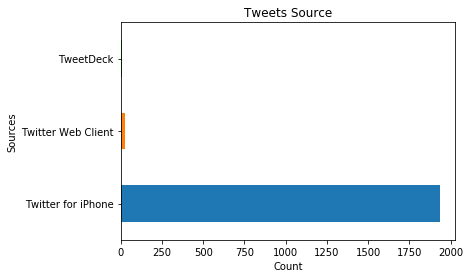

In [49]:
archive_clean.source.value_counts().plot(kind='barh')
plt.title('Tweets Source')
plt.xlabel('Count')
plt.ylabel('Sources')

fig = plt.gcf()
fig.savefig('Tweets Source.png',bbox_inches='tight');

<font color=blue> 
> ***The above graph shows that most tweets are from iPhone.***

Dog stages:

In [50]:
archive_clean.dog_stage.value_counts()

pupper     216
doggo       71
puppo       28
floofer      3
Name: dog_stage, dtype: int64

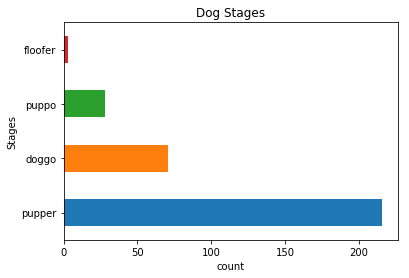

In [51]:
archive_clean.dog_stage.value_counts().plot(kind='barh')
plt.title('Dog Stages')
plt.xlabel('count')
plt.ylabel('Stages')
fig = plt.gcf()
fig.savefig('Dog Stages.png',bbox_inches='tight');

<font color=blue> 
> ***The above graph shows that the most popular Dog stage is pupper and the least one is floofer.***

I would like to know if the amount of retweets and favorites is related to the rating from WeRateDogs:

 Retweet Counts by Ratings

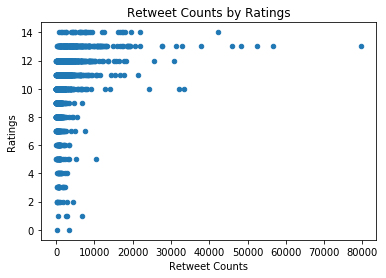

In [54]:
archive_clean.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings')

fig = plt.gcf()
fig.savefig('RetweetCnt_by_Ratings.png',bbox_inches='tight');


<font color=blue> 
> ***The above graph shows that the highest ratings do not receive the most retweets.***

Favorite count by Ratings

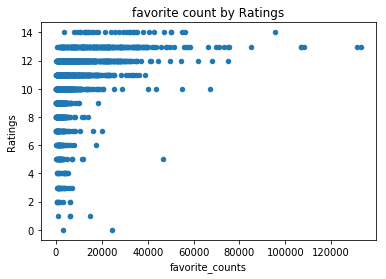

In [55]:
archive_clean.plot(x='favorite_count', y='rating_numerator', kind='scatter')
plt.xlabel('favorite_counts')
plt.ylabel('Ratings')
plt.title('favorite count by Ratings')

fig = plt.gcf()
fig.savefig('favoriteCnt_by_Ratings.png',bbox_inches='tight');


<font color=blue> 
> ***The above graph shows that the highest ratings do not have the most favorite counts.***